In [1]:
import torch 
import torch.nn.functional as F 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
# read in all the words 
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
# build the vocabulary of characters and mappings to/from integers 
chars = sorted(list(set(''.join(words))))
stoi = {c:i+1 for i,c in enumerate(chars)}
stoi['.'] = 0 
itos = {i:c for c,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [27]:
# build the train/test/split 
block_size = 3
def build_dataset(words):
    X, Y = [], []
    for w in words:
        context = [0] * block_size 
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            # print(''.join([itos[i] for i in context]), '--->', ch)
            context = context[1:] + [ix]
    return torch.tensor(X), torch.tensor(Y)

import random
random.seed(42)
random.shuffle(words)
n1 = int(len(words) * 0.8)
n2 = int(len(words) * 0.9)

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

In [54]:
g = torch.Generator().manual_seed(2147483647)

chars = 27 # number of characters in vocabulary
dimensions = 10 # number of dimensions in embedding
neurons = 200 # number of neurons in hidden layer

# initialize parameters with random values
C = torch.randn((chars, dimensions), generator=g)
W1 = torch.randn((dimensions*block_size, neurons), generator=g)  * 0.2
b1 = torch.randn(neurons, generator=g)  * 0.01
W2 = torch.randn((neurons, chars), generator=g) * 0.01
b2 = torch.randn(chars, generator=g) * 0
params = [C, W1, b1, W2, b2]

# tell PyTorch to track gradients for all parameters
for p in params:
    p.requires_grad_()

stepi = []
losstri = []
training_steps = 200000
for i in range(training_steps):
    # minibatch 
    batch_size = 32
    ix = torch.randint(0, Xtr.shape[0], (batch_size,))

    # forward pass on just minibatch
    emb = C[Xtr[ix]]
    hpreact = emb.view(-1, block_size*dimensions) @ W1 + b1
    h = torch.tanh(hpreact)
    logits = h @ W2 + b2 
    loss = F.cross_entropy(logits, Ytr[ix]) 

    # backward pass
    for p in params:
        p.grad = None
    loss.backward()

    # update parameters
    lr = 0.1 if i < 100000 else 0.01
    for p in params:
        p.data -= lr * p.grad

    # track stats 
    stepi.append(i)
    losstri.append(loss.item())

    print(i, loss.item())

    break

0 3.2988507747650146


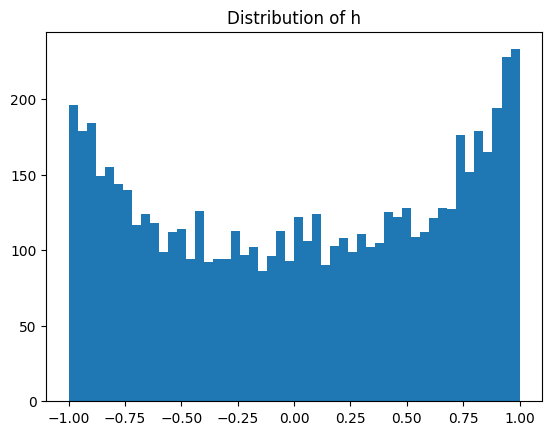

In [55]:
plt.hist(h.view(-1).tolist(), 50);
# set title 
plt.title('Distribution of h');

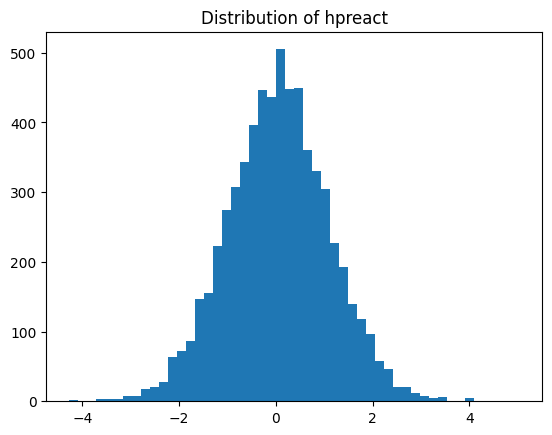

In [56]:
plt.hist(hpreact.view(-1).tolist(), 50);
# add title 
plt.title('Distribution of hpreact');

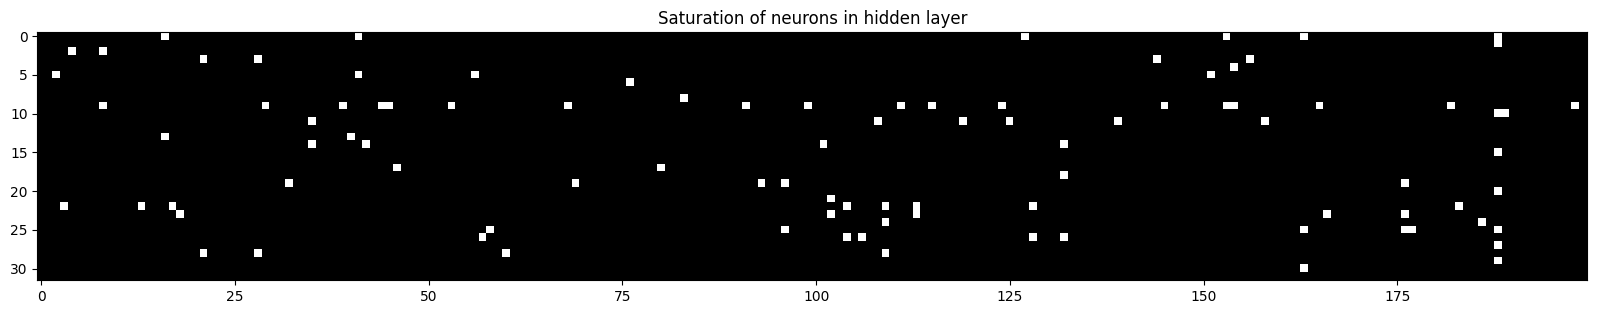

In [62]:
plt.figure(figsize=(20,10))
plt.imshow(h.abs() > 0.99, cmap='grey', interpolation='nearest');
# set title 
plt.title('Saturation of neurons in hidden layer');

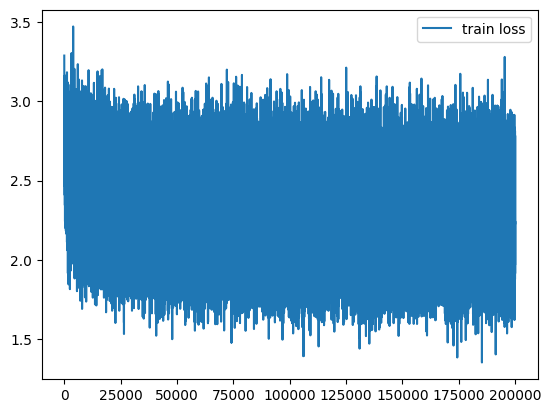

In [11]:
plt.plot(stepi, losstri, label='train loss')
plt.legend()

In [7]:
for X, Y in [(Xtr, Ytr), (Xdev, Ydev), (Xte, Yte)]:
    emb = C[X] # embedding lookup (32, 3, 2)
    h = torch.tanh(emb.view(-1, block_size*dimensions) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y) # (32, 100)
    print(loss.item())

2.278364419937134
2.2786591053009033
2.2798070907592773


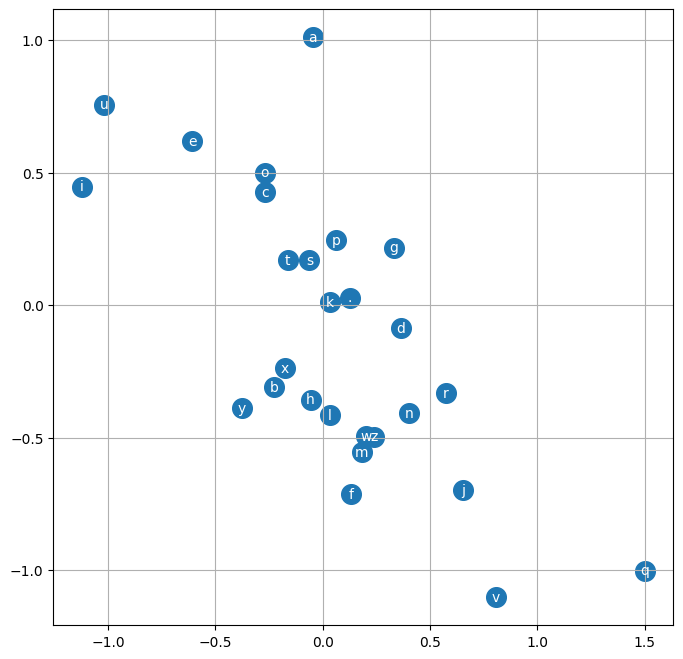

In [8]:
plt.figure(figsize=(8, 8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i, 0].item(), C[i, 1].item(), itos[i], ha="center", va="center", color="w")
plt.grid('minor')

In [9]:
# sample fom the model 
g = torch.Generator().manual_seed(2147483647)
for _ in range(1000):
    out = []
    context = [0] * (block_size)
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, 1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break   
    
    print(''.join([itos[i] for i in out[:-1]]))

cexze
zomalura
carity
kerliistttain
lunan
kanda
samiyah
jaler
gotai
molie
cavo
kerted
jekany
messhey
niavi
nyza
bstih
cinghatahlyn
kasdr
banesler
awaisan
jrazdinne
zamyder
jairit
gaika
bhaabsanth
kuysthelleyan
menah
keena
malis
lmiia
josor
myson
lapteyn
dengeris
ciyen
keille
lahmie
meezhana
hoama
mory
asharfi
alcanah
jarceis
zalelane
nechay
ralona
jyvia
iskoh
aganil
buhycah
eallan
anuutetonnari
baysa
beka
mervilahda
adada
kai
ghorry
laahraryla
cungo
pora
yelen
aixgos
lryme
jancla
tirie
palda
zyna
erzier
jatturi
sobrri
alavimeancie
morad
lieina
caaminf
mimemano
seada
kasor
pariyn
keika
soynn
miudrwa
razhan
jindelie
kedie
zamih
adenon
vedre
jamary
azemion
steta
ledike
sakon
zorca
alaica
chima
avalliins
bohmen
caikeyah
dadigw
aaromen
raole
puliy
elyn
jalina
ahrelyo
disho
diviar
tafile
erdjhemny
arile
dislan
aishanon
iyardyeth
kazlei
us
cendyn
lasakhynen
gessere
ahdri
alsodahna
ahava
elilan
jadaina
nav
anava
keyx
jalon
azaai
soben
brimigu
baleti
raison
bona
duyren
koodaen
alan
raiia
yolyn
